# Exploration and training of the Iris Dataset

### Uses Seaborn and pandas to explore the Iris dataset and find patterns between data of 150 Iris flowers of 3 different subspecies

Importing files and ignoring seaborn warnings, setting a simple seaborn style

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

Loading the dataset into df and printing the first 5 rows

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Each species has 50 samples

In [3]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Simple scatter plot to see connections between sepal length/width and petal length/width

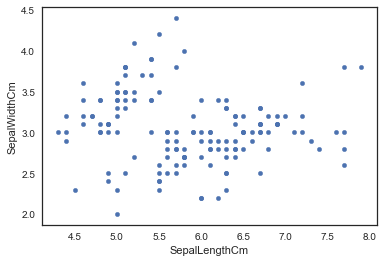

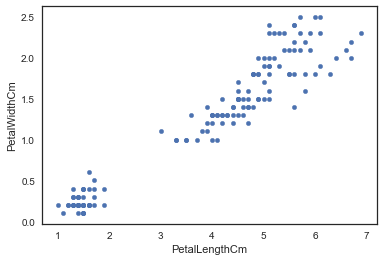

In [4]:
df.plot(kind='scatter',x="SepalLengthCm", y="SepalWidthCm")
df.plot(kind='scatter',x="PetalLengthCm", y="PetalWidthCm")

Data distribution in the above graph seems to be split into groups,
so we use a FacetGrid and set the 'hue' to the 'Species' column
This gives a different color to the points in the scatter plot based on their Species value

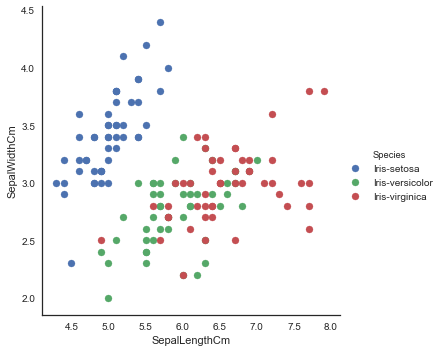

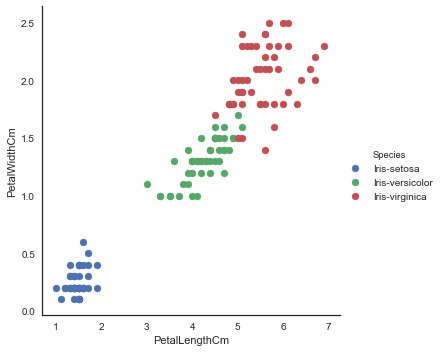

In [5]:
sns.FacetGrid(df, size=5,hue="Species").map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
sns.FacetGrid(df, size=5,hue="Species").map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()

So from this plot we can see that Petal length and width play a very important differentiating factor
(iris setosa has small petal length and width, virginica has the largest)

Making a boxplot to see the distribution of petal length for each species

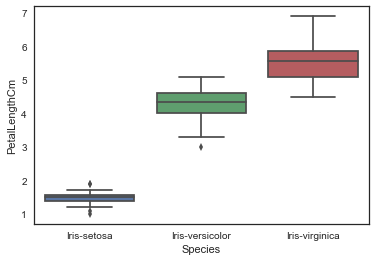

In [6]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

Boxplot of Petal Width species-wise

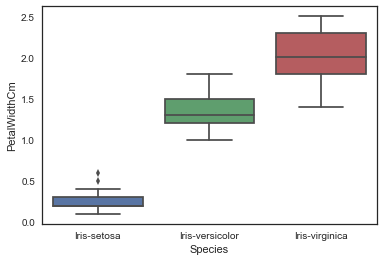

In [7]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

A stripplot with jitter so we can see the distribution of values more clearly.
Jitter=True makes it so the points don't fall in a straight line (in this plot X coord.s don't matter)

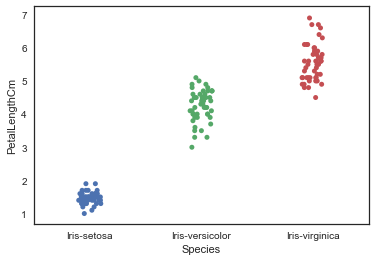

In [8]:
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

Violin plots are the combination of scatter plots and box plots.
We can see the density of distribution of values for the features

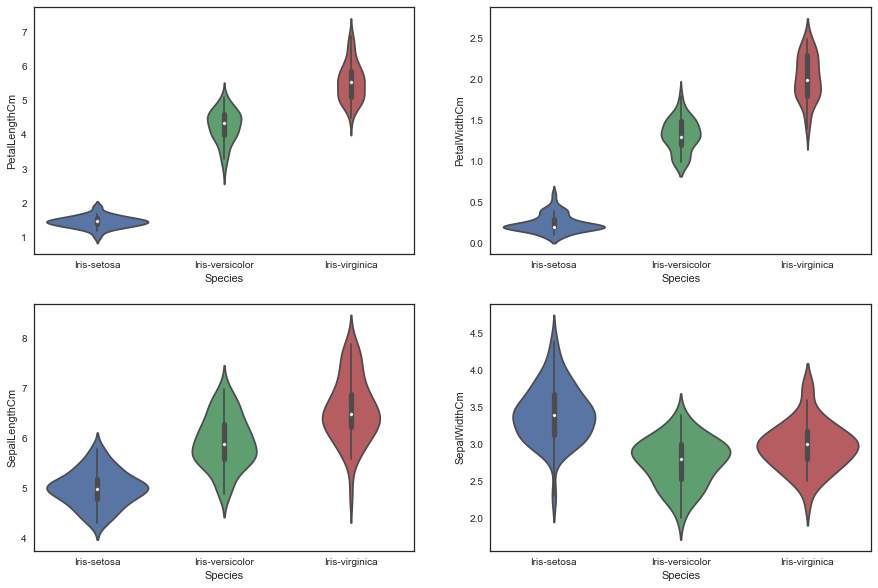

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

KDE: Kernel Density Estimate.
This shows the distribution density more clearly.
We use a FacetGrid with hue = 'Species'.
.add_legend() adds the legend on the top rights.

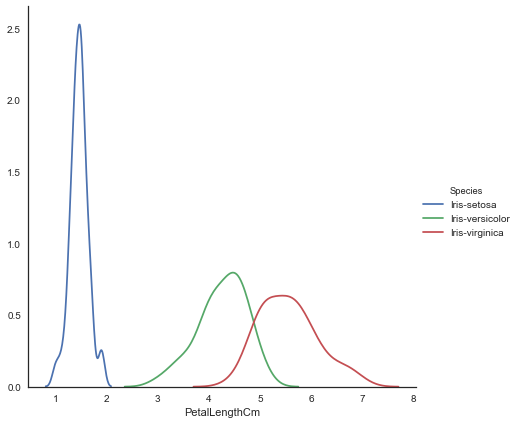

In [10]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs)with hue = "Species"

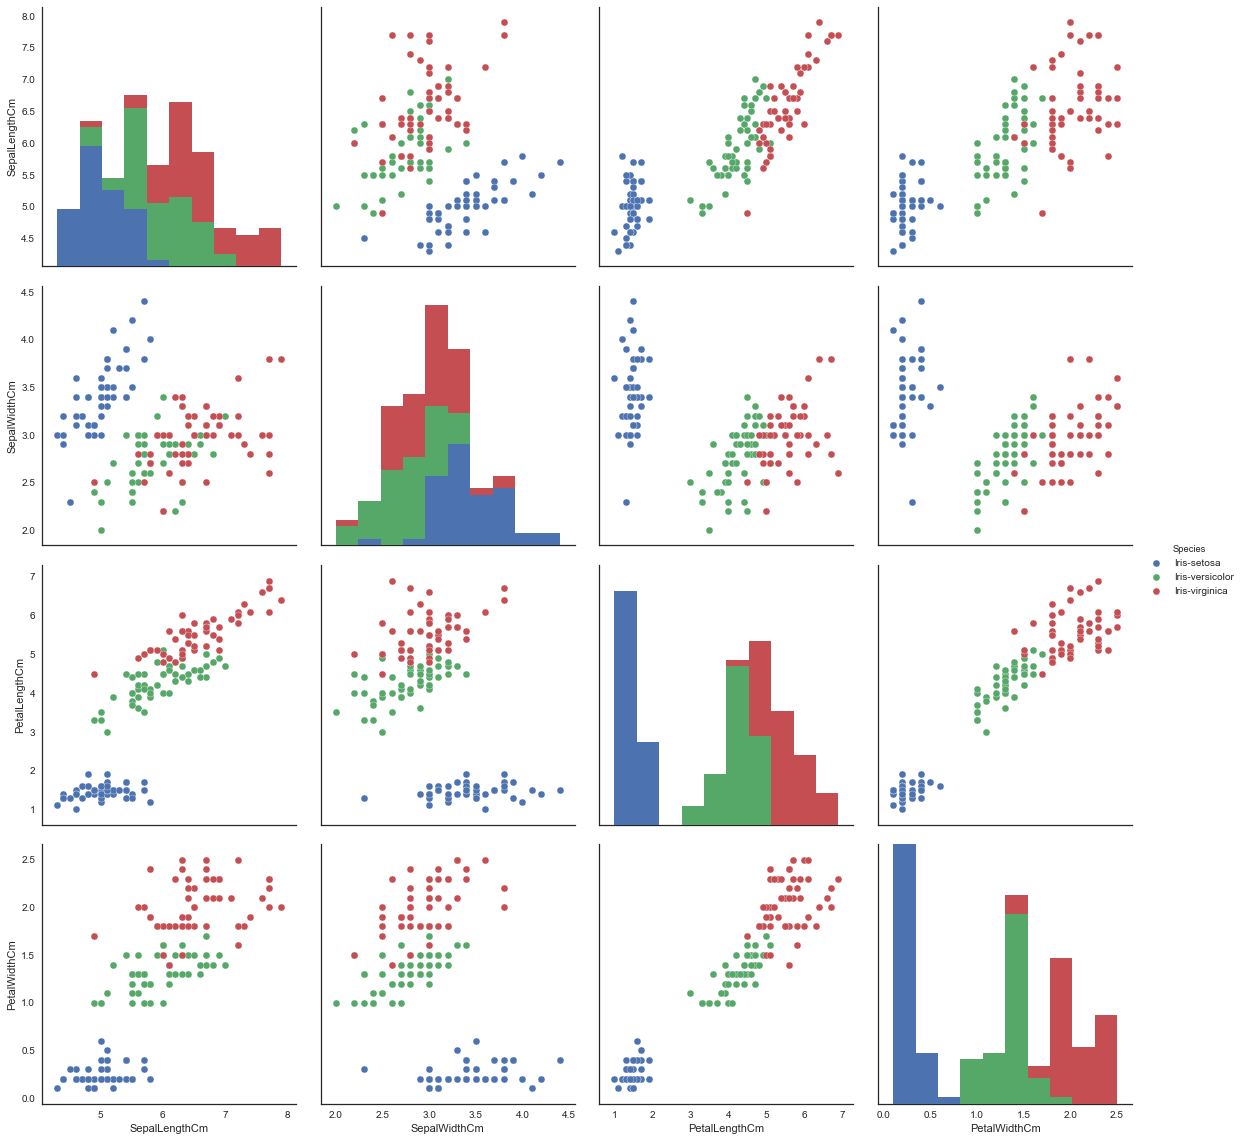

In [11]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=4)

Finding Correlation between the 4 numeric values given in the dataset

In [19]:
corr = df.corr()
corr.shape

(4, 4)

Plotting a heatmap showing the correlation of the features

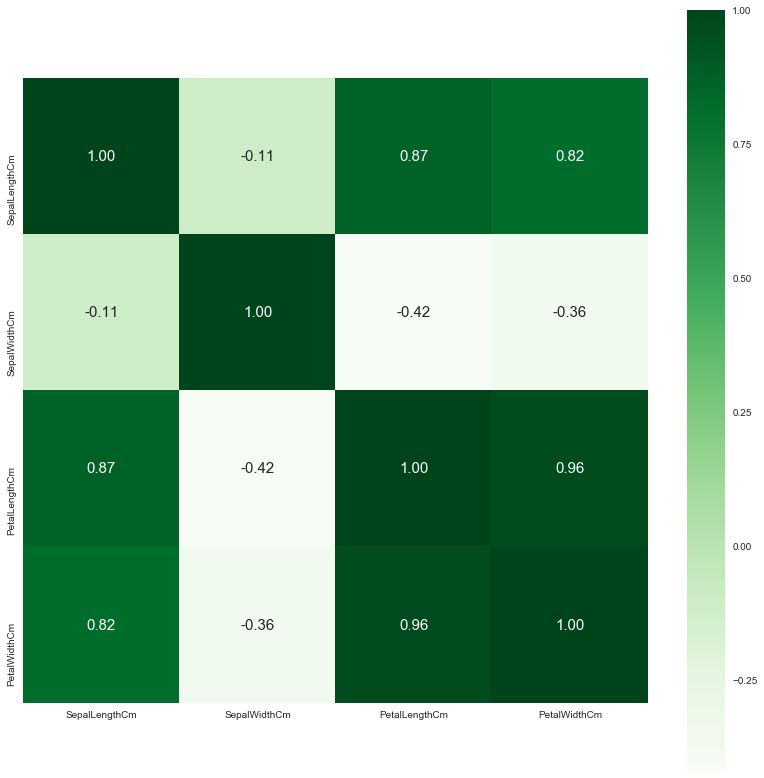

In [20]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f',annot=True,annot_kws={'size':15}, cmap='Greens')

So from this we can see that the following are closely correlated:
Petal Length, Sepal Length. 
Petal Width, Sepal Length. 
Petal Length, Petal Width. 

# Training models

### We will use Logistic Regression and KNN
#### Train Test Split splits the data into 70:30 ratio. We will train the model on 70% of the data

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression  
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Dropping the ID axis because it's not of use in training, and splitting the dataset

In [13]:
df.drop('Id',axis=1,inplace=True)
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


Creating the train and test datasets. X will be the input, y the output

In [14]:
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

In [15]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
59,5.2,2.7,3.9,1.4
34,4.9,3.1,1.5,0.1
136,6.3,3.4,5.6,2.4
95,5.7,3.0,4.2,1.2
135,7.7,3.0,6.1,2.3


Fitting the data on Logistic Regression:

In [16]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y)*100 ,'percent')

The accuracy of the Logistic Regression is 95.55555555555556 percent


Fitting the data on K Neighbors Classifier with neighbors=3

In [17]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y)*100, 'percent')

The accuracy of the KNN is 100.0 percent
